## Data Processing

In [326]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import pandas as pd

In [327]:
file_path = "../Data/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [328]:
dtypes_df = pd.DataFrame(df.dtypes, columns=['dtype'])
desc = df.describe(include='all').T
summary = dtypes_df.join(desc)
summary

,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,int64,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,object,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,float64,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,int64,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,int64,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,object,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,object,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,object,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,float64,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,float64,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


In [329]:
df.drop(columns=['id'], inplace=True)

In [330]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [331]:
imputer = SimpleImputer(strategy="mean")
df["bmi"] = imputer.fit_transform(df[["bmi"]])

In [332]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [333]:
df = pd.get_dummies(df, drop_first=True)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,False,False,True,False,True,False,False,True,False,True,False
5106,81.0,0,0,125.20,40.000000,0,False,False,True,False,False,True,False,True,False,True,False
5107,35.0,0,0,82.99,30.600000,0,False,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,True,False,True,False,True,False,False,False,True,False,False


In [334]:
X = df.drop(columns=["stroke"])
y = df["stroke"]

In [335]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [337]:
model_depth = nn.Sequential(
    nn.Linear(X_train.shape[1], 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 2)   # output 2 kelas
)

In [338]:
model_breadth = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 2)
)

In [339]:
def train_model_history(model, X_train, y_train, X_test, y_test, epochs, lr):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    history = {"train_loss": [], "test_loss": [], "test_acc": []}

    for epoch in range(epochs):
        # Training step
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # Evaluasi test set
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            _, predicted = torch.max(test_outputs, 1)
            acc = (predicted == y_test).sum().item() / len(y_test)

        # Simpan history
        history["train_loss"].append(loss.item())
        history["test_loss"].append(test_loss)
        history["test_acc"].append(acc)

    return history

## Training Imbalance Data

In [340]:
history_depth = train_model_history(model_depth, X_train, y_train, X_test, y_test, epochs=100, lr=0.1)

In [341]:
history_depth['test_acc'][-1]

0.9393346379647749

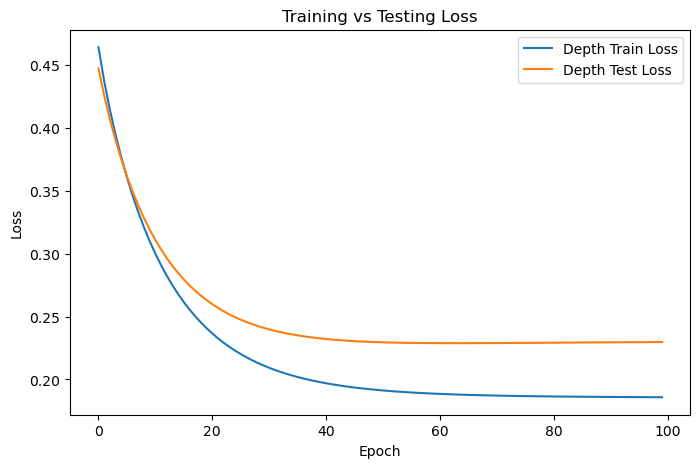

In [342]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history_depth["train_loss"], label="Depth Train Loss")
plt.plot(history_depth["test_loss"], label="Depth Test Loss")
plt.title("Training vs Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [343]:
history_breadth = train_model_history(model_breadth, X_train, y_train, X_test, y_test, epochs=100, lr=0.5)


history_breadth['test_acc'][-1]

0.9393346379647749

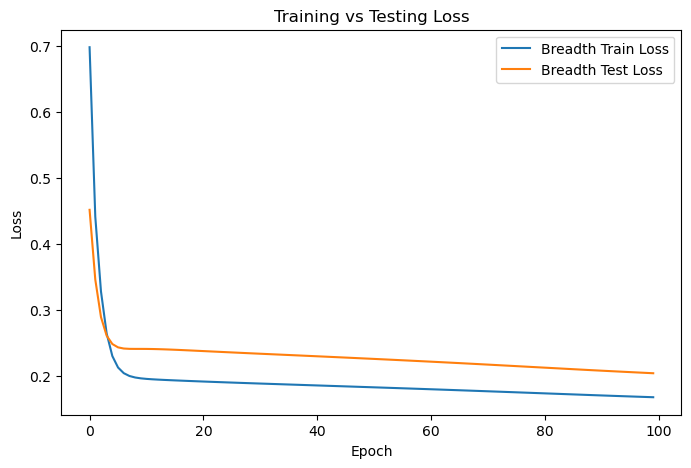

In [344]:
plt.figure(figsize=(8,5))
plt.plot(history_breadth["train_loss"], label="Breadth Train Loss")
plt.plot(history_breadth["test_loss"], label="Breadth Test Loss")
plt.title("Training vs Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Handling Data Imbalance

Reference : https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/14_imbalanced/handling_imbalanced_data.ipynb

YT : https://youtu.be/JnlM4yLFNuo?si=GYr0KsCwp4ZUwpYS

## Undersampling Method

In [345]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [346]:
count_class_0, count_class_1 = df['stroke'].value_counts()

df_class_0 = df[df['stroke'] == 0]
df_class_1 = df[df['stroke'] == 1]

In [347]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['stroke'].value_counts())

Random under-sampling:
stroke
0    249
1    249
Name: count, dtype: int64


In [348]:
X = df_test_under.drop('stroke',axis='columns')
y = df_test_under['stroke']
X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [349]:
history_depth_under = train_model_history(model_depth, X_train, y_train, X_test, y_test, epochs=100, lr=0.1)

history_depth_under['test_acc'][-1]

0.73

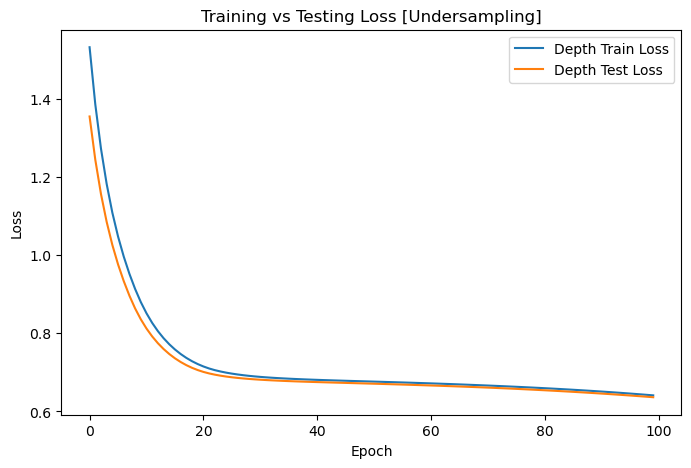

In [350]:
plt.figure(figsize=(8,5))
plt.plot(history_depth_under["train_loss"], label="Depth Train Loss")
plt.plot(history_depth_under["test_loss"], label="Depth Test Loss")
plt.title("Training vs Testing Loss [Undersampling]")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [351]:
history_breadth_under = train_model_history(model_breadth, X_train, y_train, X_test, y_test, epochs=100, lr=0.1)

history_breadth_under['test_acc'][-1]

0.72

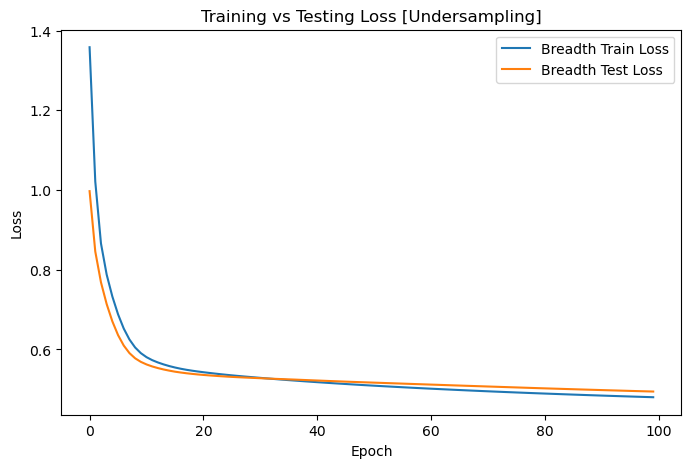

In [352]:
plt.figure(figsize=(8,5))
plt.plot(history_breadth_under["train_loss"], label="Breadth Train Loss")
plt.plot(history_breadth_under["test_loss"], label="Breadth Test Loss")
plt.title("Training vs Testing Loss [Undersampling]")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Oversampling Method

In [353]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['stroke'].value_counts())

Random over-sampling:
stroke
0    4861
1    4861
Name: count, dtype: int64


In [354]:
X = df_test_over.drop('stroke',axis='columns')
y = df_test_over['stroke']
X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [355]:
history_depth_over = train_model_history(model_depth, X_train, y_train, X_test, y_test, epochs=100, lr=0.1)

history_depth_over['test_acc'][-1]

0.7598971722365039

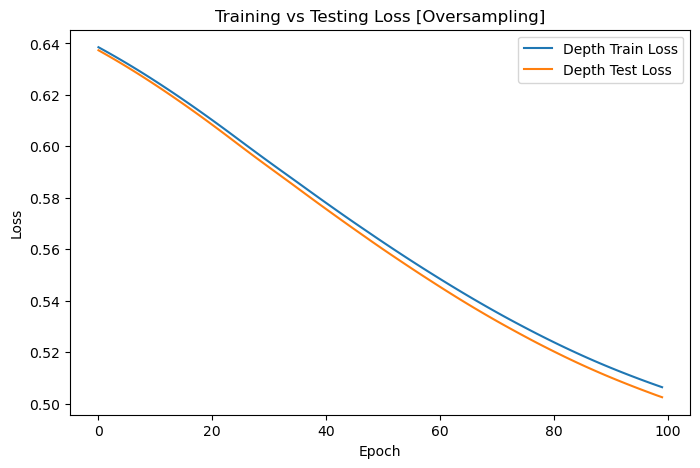

In [356]:
plt.figure(figsize=(8,5))
plt.plot(history_depth_over["train_loss"], label="Depth Train Loss")
plt.plot(history_depth_over["test_loss"], label="Depth Test Loss")
plt.title("Training vs Testing Loss [Oversampling]")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [357]:
history_breadth_over = train_model_history(model_breadth, X_train, y_train, X_test, y_test, epochs=100, lr=0.1)

history_breadth_over['test_acc'][-1]

0.777892030848329

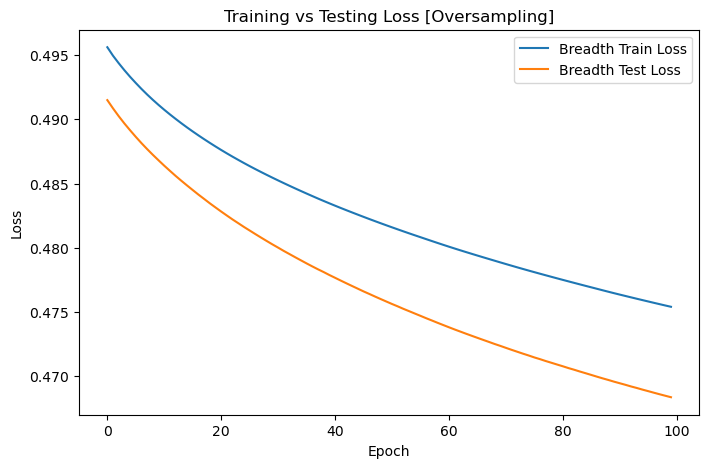

In [358]:
plt.figure(figsize=(8,5))
plt.plot(history_breadth_over["train_loss"], label="Breadth Train Loss")
plt.plot(history_breadth_over["test_loss"], label="Breadth Test Loss")
plt.title("Training vs Testing Loss [Oversampling]")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## SMOTE Method

In [359]:
X = df.drop(columns=["stroke"], axis='columns')
y = df["stroke"]

In [360]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [361]:
X_sm = MinMaxScaler().fit_transform(X_sm)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [362]:
history_depth_sm = train_model_history(model_depth, X_train, y_train, X_test, y_test, epochs=100, lr=0.1)

history_depth_sm['test_acc'][-1]

0.8555269922879177

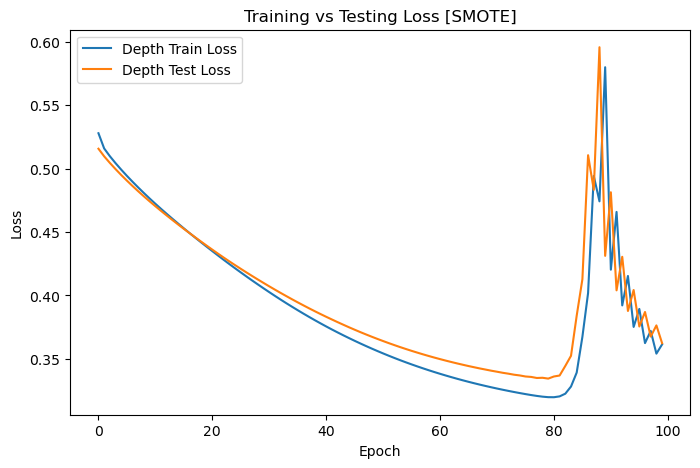

In [363]:
plt.figure(figsize=(8,5))
plt.plot(history_depth_sm["train_loss"], label="Depth Train Loss")
plt.plot(history_depth_sm["test_loss"], label="Depth Test Loss")
plt.title("Training vs Testing Loss [SMOTE]")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [364]:
history_breadth_sm = train_model_history(model_breadth, X_train, y_train, X_test, y_test, epochs=100, lr=0.1)

history_breadth_sm['test_acc'][-1]

0.8519280205655527

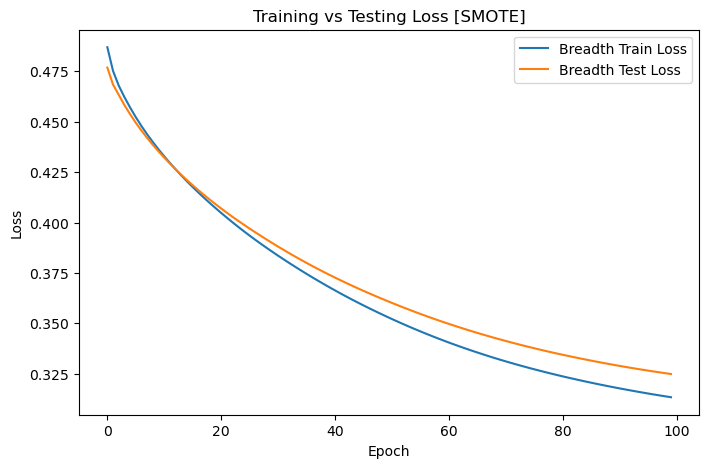

In [365]:
plt.figure(figsize=(8,5))
plt.plot(history_breadth_sm["train_loss"], label="Breadth Train Loss")
plt.plot(history_breadth_sm["test_loss"], label="Breadth Test Loss")
plt.title("Training vs Testing Loss [SMOTE]")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()